In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Эта строка устанавливает начальное состояние (seed) генератора случайных чисел
np.random.seed(42)

X = 2 * np.random.rand(150, 1)
y = 3 * X + 5 + np.random.randn(150, 1)

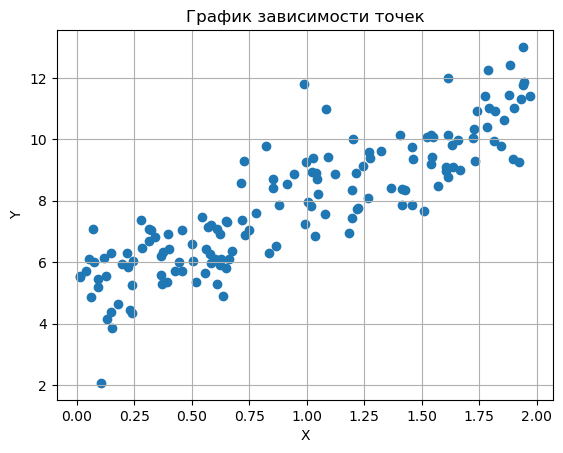

In [3]:
# Изображение точек
plt.scatter(X, y)

plt.title('График зависимости точек')
plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)
plt.show();

In [ ]:
def bgd_linear_regression(X, y, learning_rate, epochs, batch_size):
    m, n = X.shape
    # Инициализация весов (θ₀, θ₁)
    theta = np.random.randn(n + 1, 1) 
    # Добавляем столбец единиц для θ₀
    X_b = np.c_[np.ones((m, 1)), X]   
    
    for epoch in range(epochs):
        # Случайное перемешивание данных
        indices = np.random.permutation(m) 
        X_shuffled = X_b[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            gradient = 2 * X_batch.T.dot(X_batch.dot(theta) - y_batch) /batch_size
            # обновление весов модели (θ) с помощью градиентного спуска
            theta -= learning_rate * gradient

    return theta

In [5]:
theta = bgd_linear_regression(X, y, learning_rate=0.005, epochs=100, batch_size=20)
print(f"Найденные коэффициенты: θ₀ = {theta[0][0]:.2f}, θ₁ = {theta[1][0]:.2f}")

Найденные коэффициенты: θ₀ = 4.74, θ₁ = 3.28


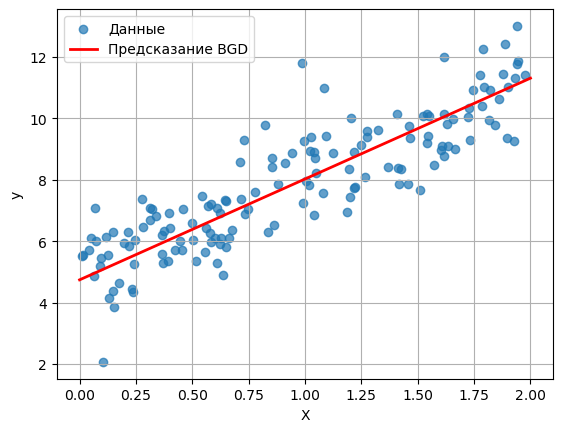

In [6]:
# Предсказание
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta)

# График
plt.scatter(X, y, alpha=0.7, label="Данные")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Предсказание BGD")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.grid(True)
plt.show();

In [ ]:
def sgd_linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    # Инициализация весов (θ₀, θ₁)
    theta = np.random.randn(n + 1, 1)
    # Добавляем столбец единиц для θ₀
    X_b = np.c_[np.ones((m, 1)), X]   
    
    for epoch in range(epochs):
        for i in range(m):
            # Один пример (размер 1x(n+1))
            X_i = X_b[i:i+1]  
            y_i = y[i:i+1]
            gradient = 2 * X_i.T.dot(X_i.dot(theta) - y_i)
            theta -= learning_rate * gradient

    return theta

In [8]:
theta = sgd_linear_regression(X, y, learning_rate=0.005, epochs=1000)
print(f"Найденные коэффициенты: θ₀ = {theta[0][0]:.2f}, θ₁ = {theta[1][0]:.2f}")

Найденные коэффициенты: θ₀ = 4.94, θ₁ = 3.09


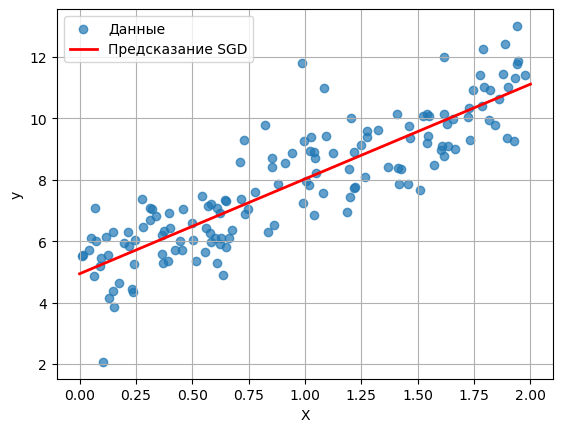

In [9]:
# Предсказание
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta)

# График
plt.scatter(X, y, alpha=0.7, label="Данные")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Предсказание SGD")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.grid(True)
plt.show();

In [ ]:
def gd_linear_regression(X, y, learning_rate, epochs, tol=1e-6):
    m, n = X.shape
    # Инициализация весов
    theta = np.random.randn(n + 1, 1)
    # Добавляем столбец единиц  
    X_b = np.c_[np.ones((m, 1)), X]   
    
    losses = []
    prev_loss = np.inf
    
    for epoch in range(epochs):
        # Вычисляем предсказания и ошибку
        predictions = X_b.dot(theta)
        error = predictions - y
        
        # Вычисляем градиент и обновляем веса
        gradient = 2/m * X_b.T.dot(error)
        theta -= learning_rate * gradient
        
        # Вычисляем MSE для мониторинга
        current_loss = np.mean(error**2)
        losses.append(current_loss)
        
        # Критерий остановки
        if abs(prev_loss - current_loss) < tol:
            print(f"Сходимость достигнута на эпохе {epoch}")
            break
            
        prev_loss = current_loss
        
    return theta, losses

In [11]:
theta, losses = gd_linear_regression(X, y, learning_rate=0.1, epochs=1000)
print(f"Обученные веса: θ₀={theta[0][0]:.2f}, θ₁={theta[1][0]:.2f}")

Сходимость достигнута на эпохе 136
Обученные веса: θ₀=4.97, θ₁=3.08


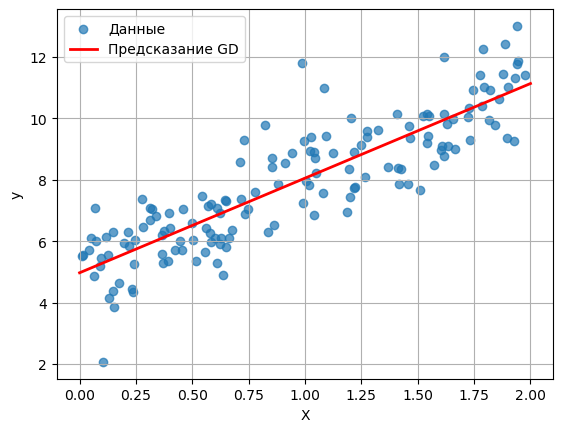

In [12]:
# Предсказание
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta)

# График
plt.scatter(X, y, alpha=0.7, label="Данные")
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Предсказание GD")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.grid(True)
plt.show();